<a href="https://colab.research.google.com/github/devanshbanka/Credit-Card-Fraud-Detection-Machine-Learning/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# For Random Forest
from sklearn.ensemble import RandomForestClassifier

# For Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# For Neural Networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# For Result Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

np.random.seed(0)

In [ ]:
# Read data into a dataframe
data = pd.read_csv('/content/creditcard.csv')

# Data exploration

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
len(data)

284807

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* No missing values

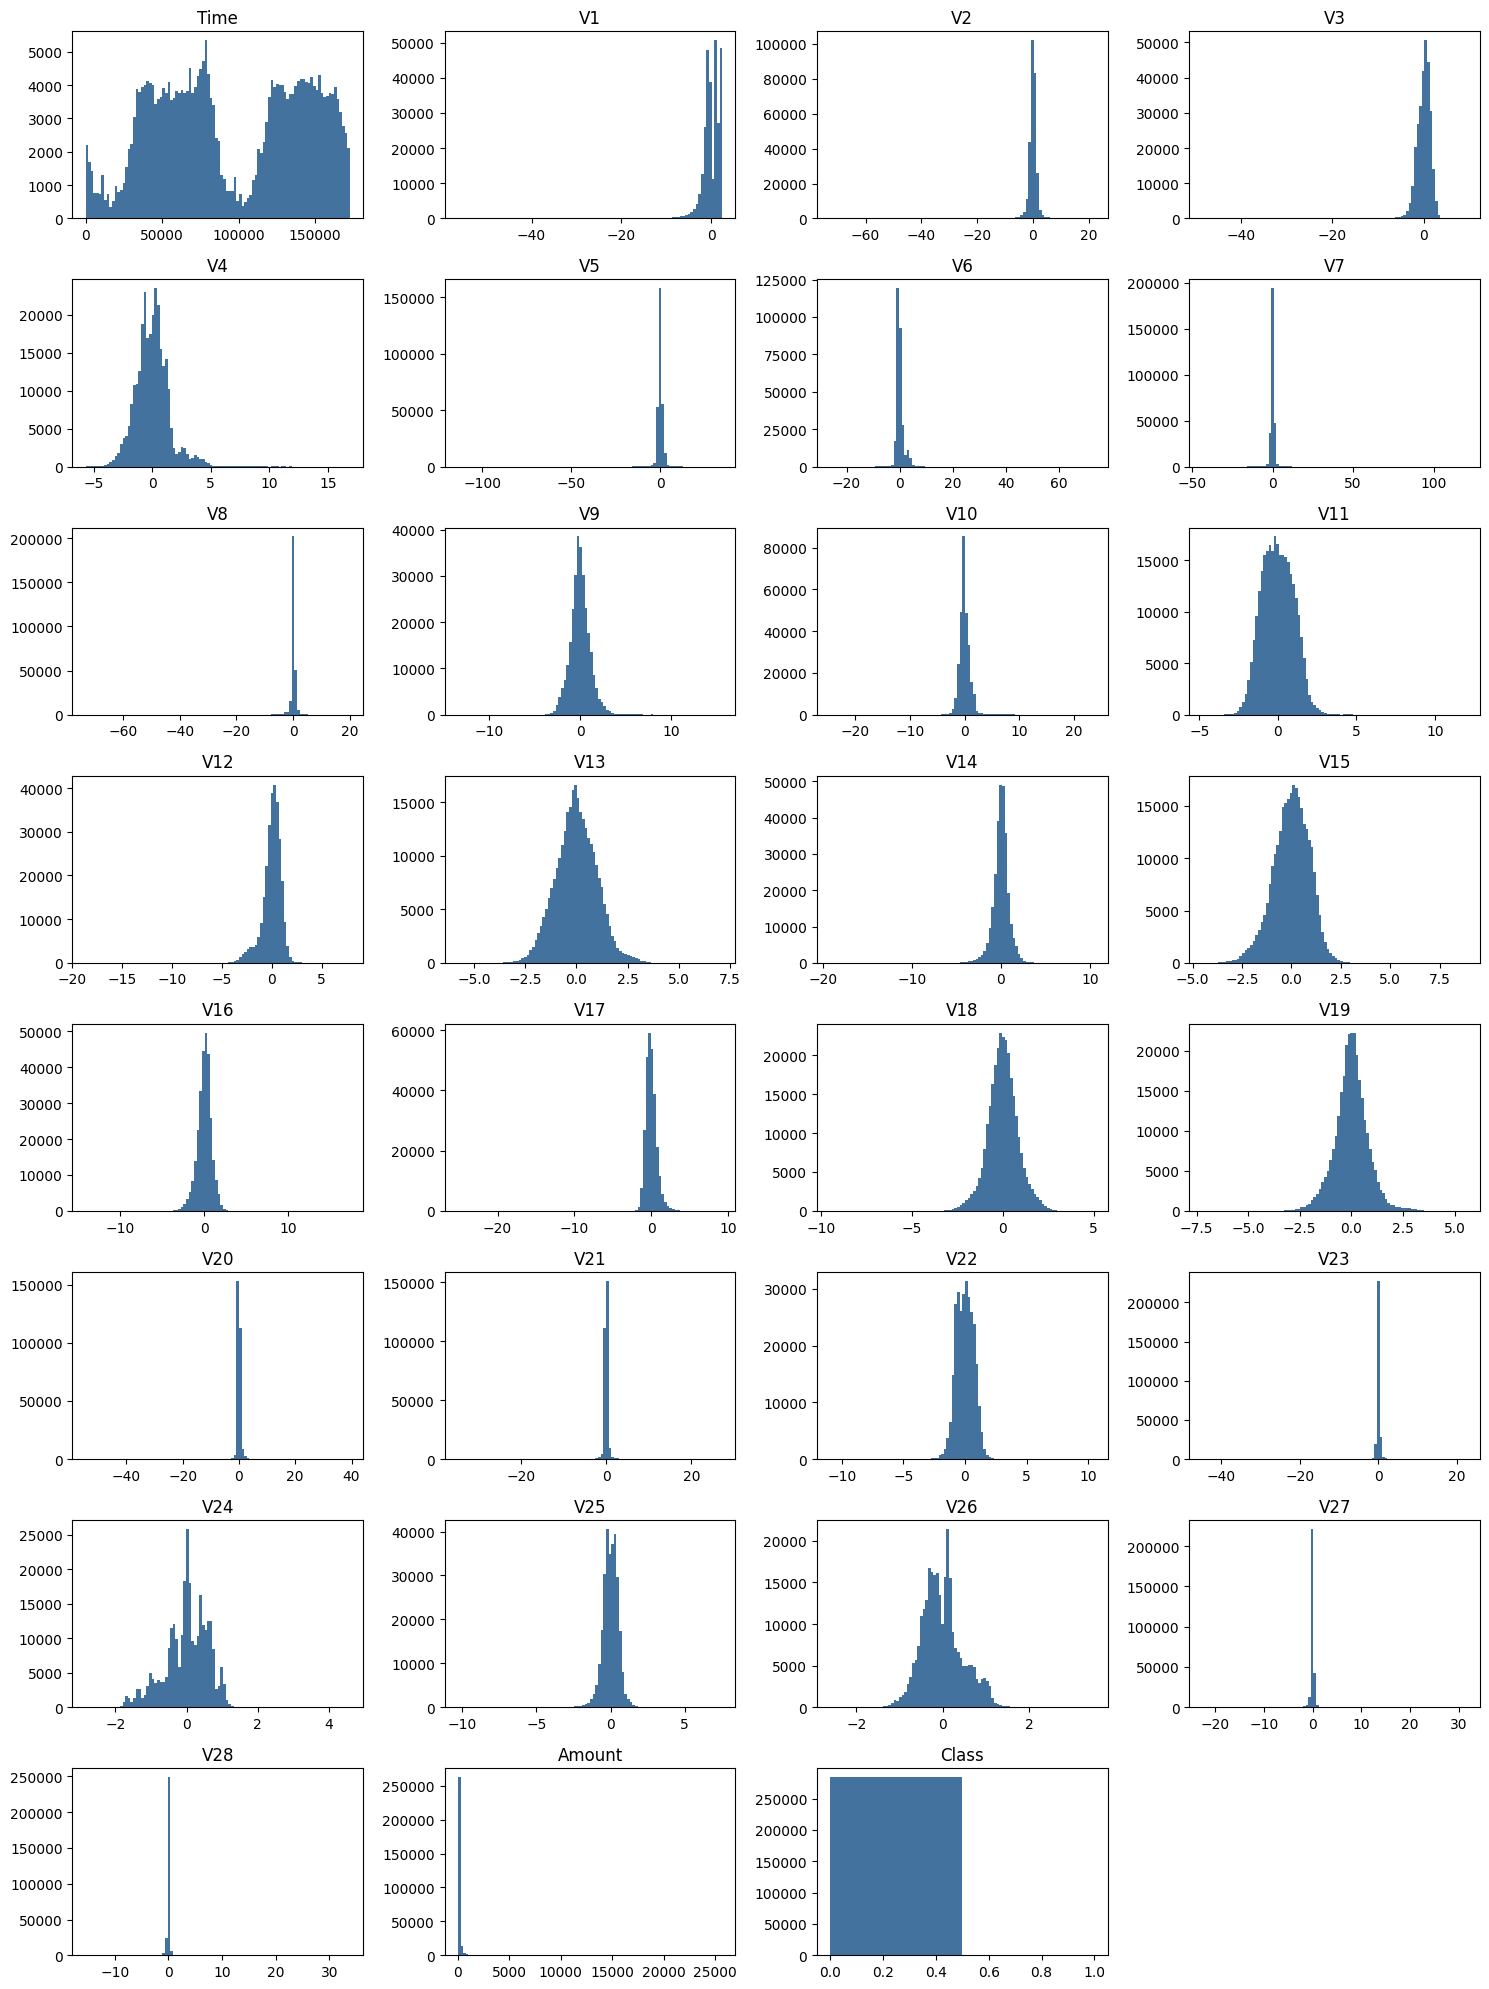

In [ ]:
# Histograms of Numerical Columns
fig = plt.figure(figsize=(15, 20))
for i in range(data.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca() # get current axis
    f.set_title(data.columns.values[i])

    vals = np.size(data.iloc[:, i].unique())
    if vals >= 100:
        vals = 100 # maximum 100 bins for better visualization

    plt.hist(data.iloc[:, i], bins=vals, color='#44729E')
plt.tight_layout()

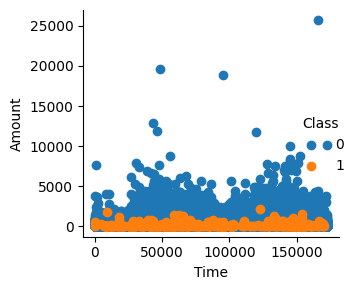

In [ ]:
sns.FacetGrid(data, hue='Class').map(plt.scatter, 'Time', 'Amount').add_legend()
plt.tight_layout()
plt.show()

* Fraud transactions (Class 1) are spread throughout the time period, and seem to generally not be above an amount of 2500.

In [ ]:
greater = 0
less = 0
for i in range(data.shape[0]):
    if(data.iloc[i]["Amount"] < 2500):
        less += 1
    else:
        greater += 1
print('Transactions of Amount > 2500: ',greater)
print('Transactions of Amount < 2500: ',less)

Transactions of Amount > 2500:  449
Transactions of Amount < 2500:  284358


In [ ]:
percent_less = (less/data.shape[0])*100
print(percent_less,'% of Transaction Amounts are less than 2500')

99.84234938045763 % of Transaction Amounts are less than 2500


In [ ]:
fraud = 0
legitimate = 1
for i in range(data.shape[0]):
    if(data.iloc[i]["Amount"]<2500):
        if(data.iloc[i]["Class"] == 0):
            legitimate += 1
        else:
            fraud+=1
print('Fraud Transactions of Amount < 2500: ',fraud)
print('Legitimate Transactions of Amount < 2500: ',legitimate)

Fraud Transactions of Amount < 2500:  492
Legitimate Transactions of Amount < 2500:  283867


In [ ]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

* Number of Fraud transactions below the Amount of 2500 is the same as the total number of Fraud transactions.
* Hence, all Fraud transactions are of amount less than 2500.

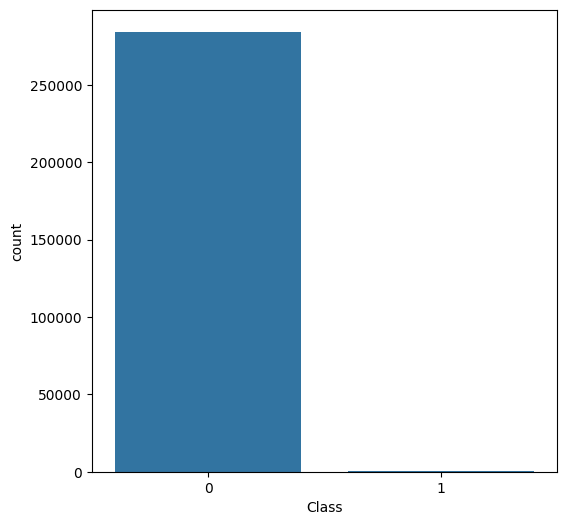

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x=data['Class'])
plt.show()

* From the countplot, we can observe a Class Imbalance Problem with majority class label '0' and minority class label '1'.

In [ ]:
data["Class"].value_counts(1)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

* Only 0.1727% of the card transactions are Fraud

### Insights from Data Exploration:
* The dataset comprises a total of 31 features, labelled "V1" to "V28", "Time", "Amount" and "Class".
* "V1" to "V28" are unknown or anonymous for confidentiality.
* "V1" to "V28", "Time" and "Amount" are input features.
* "Class" is target variable.
* The dataset contains 284807 rows.
* All features in the dataset are numerical, except for the target variable "Class," which is categorical.
* There are no missing values in the dataset, thus no imputation or handling of missing data is required.
* Class 0 signifies a Legitimate Transaction, while Class 1 denotes a Fraudulent Transaction.
* Number of Fraud transactions below the Amount of 2500 is the same as the total number of Fraud transactions. Hence, all Fraud transactions are of amount less than 2500.
* A significant class imbalance is observed, with a large prevalence of Class 0 (Legitimate Transactions) compared to Class 1 (Fraudulent Transactions), as depicted in the countplot.

# Data Pre-processing

In [ ]:
from sklearn.preprocessing import StandardScaler
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))  # Normalizing 'Amount'

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
# The time ("Time") is distributed throughout the data equitably and hence, serves as an independent feature
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
# Split data into features and target
X = data.drop(columns=['Class'])
y = data['Class']

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [ ]:
X_train.shape

(199364, 29)

In [ ]:
X_test.shape

(85443, 29)

### Insights from Data Pre-processing:
* Normalized the 'Amount' feature using StandardScaler to ensure consistent scaling across features and facilitate convergence during model training.
* Dropped the 'Time' feature as it does not provide significant discriminatory information for predicting the target variable and could potentially introduce noise into the model.
* Split the data into features (X) and target (y) variables, with 'Class' as the target variable indicating fraudulent or non-fraudulent transactions.
* Utilized the train_test_split function to partition the dataset into training and testing sets, with 70% of the data allocated for training and 30% for testing, ensuring an adequate amount of data for model evaluation.

# Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100) # 100 decision trees

In [ ]:
random_forest.fit(X_train,y_train.values.ravel()) # np.ravel() flattens the numpy 2D array into a 1D array because scikit-learn expects the target variable to be a 1D array-like structure.

RandomForestClassifier()

In [ ]:
y_pred = random_forest.predict(X_test)

In [ ]:
random_forest.score(X_test,y_test)

0.9995084442259752

In [ ]:
print('Confusion Matrix for Random Forest on Test Dataset\n')
confusion_matrix(y_test,y_pred)

Confusion Matrix for Random Forest on Test Dataset



array([[85289,     7],
       [   35,   112]])

In [ ]:
print('Classification Report for Random Forest on Test Dataset:\n')
print(classification_report(y_test, y_pred))

Classification Report for Random Forest on Test Dataset:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.76      0.84       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print('Accuracy: ', accuracy, '\nPrecision: ', precision, '\nRecall: ', recall, '\nF1-score: ', f1_score)

Accuracy:  0.9995084442259752 
Precision:  0.9411764705882353 
Recall:  0.7619047619047619 
F1-score:  0.8421052631578947


In [ ]:
# Storing results in a dataframe for comparing various models
results_testset = pd.DataFrame([['Random Forest', accuracy, 1-recall, recall, precision, f1_score]], columns = ['Model', 'Accuracy', 'False-Negative-Rate', 'Recall', 'Precision', 'F1-Score'])
results_testset

,Model,Accuracy,False-Negative-Rate,Recall,Precision,F1-Score
0,Random Forest,0.999508,0.238095,0.761905,0.941176,0.842105


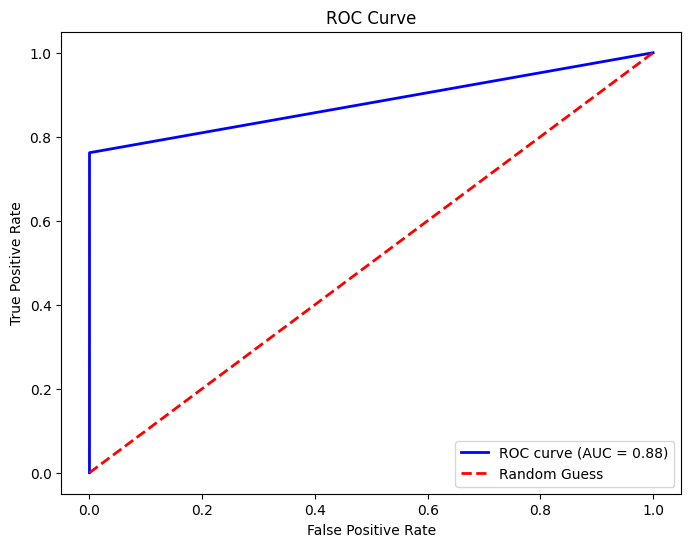

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Confusion matrix on the whole dataset
y_pred = random_forest.predict(X)
print('Confusion Matrix for Random Forest on Whole Dataset\n')
confusion_matrix(y,y_pred)

Confusion Matrix for Random Forest on Whole Dataset



array([[284308,      7],
       [    35,    457]])

In [ ]:
accuracy = accuracy_score(y,y_pred)
precision = precision_score(y,y_pred)
recall = recall_score(y, y_pred)
f1_score = f1_score(y, y_pred)
print('Accuracy: ', accuracy, '\nPrecision: ', precision, '\nRecall: ', recall, '\nF1-score: ', f1_score)

Accuracy:  0.9998525317144593 
Precision:  0.9849137931034483 
Recall:  0.9288617886178862 
F1-score:  0.9560669456066946


In [ ]:
# Storing results in a dataframe for comparing various models
results_fullset = pd.DataFrame([['Random Forest', accuracy, 1-recall, recall, precision, f1_score]], columns = ['Model', 'Accuracy', 'False-Negative-Rate', 'Recall', 'Precision', 'F1-Score'])
results_fullset

,Model,Accuracy,False-Negative-Rate,Recall,Precision,F1-Score
0,Random Forest,0.999853,0.071138,0.928862,0.984914,0.956067


### Insights from the Random Forest Model:
* Despite accurately identifying regular transactions, the model struggles with detecting fraudulent transactions, capturing only 76% of them, resulting in 35 undetected cases (False Negatives).
* The high accuracy observed is largely due to the class imbalance present in the dataset, emphasizing the need for additional evaluation metrics beyond accuracy to gauge model performance effectively.

# Decision trees

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
y_pred = decision_tree.predict(X_test)

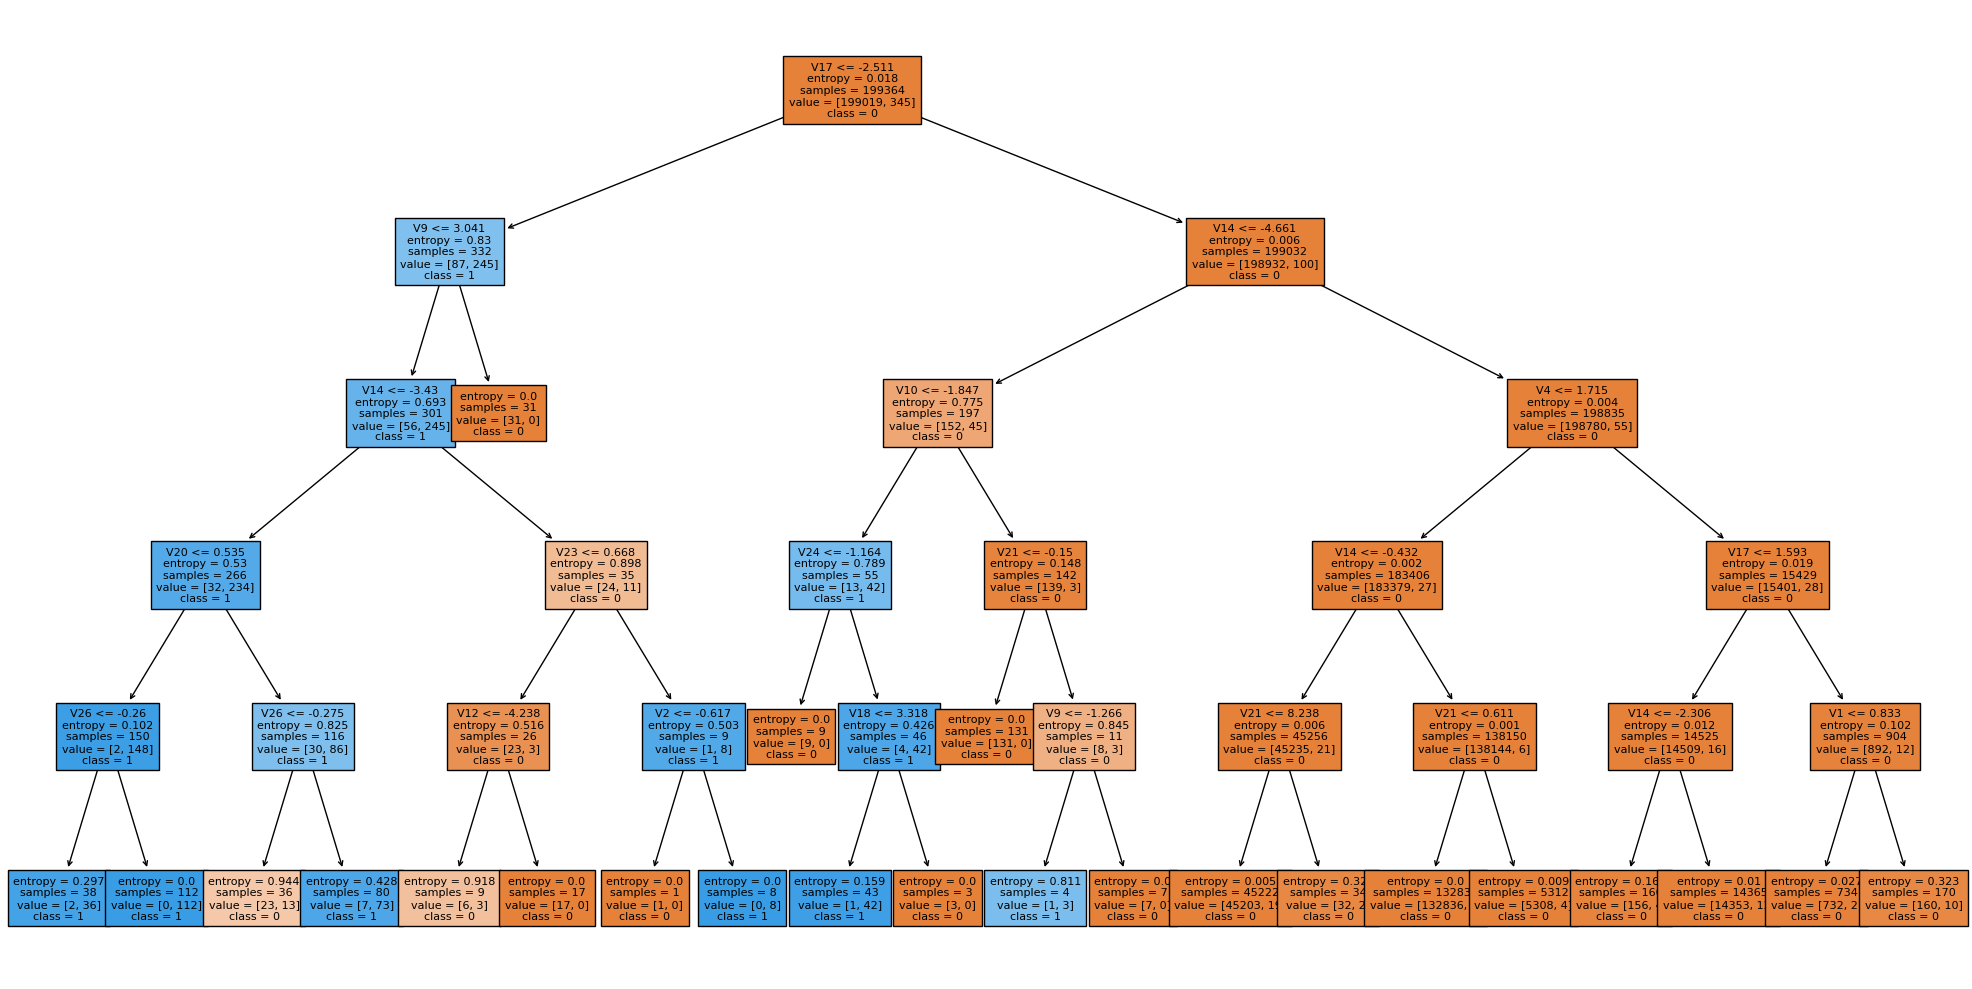

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=['0', '1'], filled=True, fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
decision_tree.score(X_test,y_test)

0.999403110845827

In [ ]:
print('Confusion Matrix for Decision Tree on Test Dataset\n')
confusion_matrix(y_test,y_pred)

Confusion Matrix for Decision Tree on Test Dataset



array([[85287,     9],
       [   42,   105]])

In [ ]:
print('Classification Report for Decision Tree on Test Dataset:\n')
print(classification_report(y_test, y_pred))

Classification Report for Decision Tree on Test Dataset:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.92      0.71      0.80       147

    accuracy                           1.00     85443
   macro avg       0.96      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print('Accuracy: ', accuracy, '\nPrecision: ', precision, '\nRecall: ', recall, '\nF1-score: ', f1_score)

Accuracy:  0.999403110845827 
Precision:  0.9210526315789473 
Recall:  0.7142857142857143 
F1-score:  0.8045977011494253


In [ ]:
# Storing results in a dataframe for comparing various models
model_results = pd.DataFrame([['DecisionTree', accuracy, 1-recall, recall, precision, f1_score]], columns = ['Model', 'Accuracy', 'False-Negative-Rate', 'Recall', 'Precision', 'F1-Score'])
results_testset = pd.concat([results_testset, model_results], ignore_index=True)
results_testset

,Model,Accuracy,False-Negative-Rate,Recall,Precision,F1-Score
0,Random Forest,0.999508,0.238095,0.761905,0.941176,0.842105
1,DecisionTree,0.999403,0.285714,0.714286,0.921053,0.804598


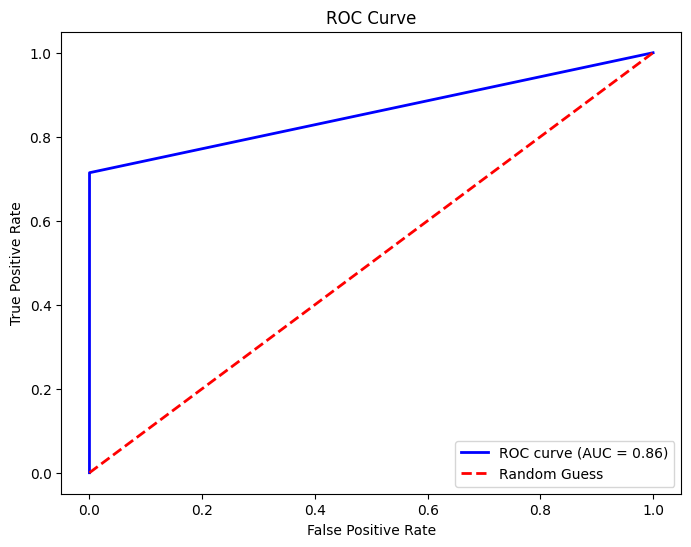

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred = decision_tree.predict(X)
print('Confusion Matrix for Decision Tree on Whole Dataset:\n')
confusion_matrix(y,y_pred.round())

Confusion Matrix for Decision Tree on Whole Dataset:



array([[284295,     20],
       [   113,    379]])

In [ ]:
accuracy = accuracy_score(y,y_pred)
precision = precision_score(y,y_pred)
recall = recall_score(y, y_pred)
f1_score = f1_score(y, y_pred)
print('Accuracy: ', accuracy, '\nPrecision: ', precision, '\nRecall: ', recall, '\nF1-score: ', f1_score)

Accuracy:  0.9995330170957877 
Precision:  0.949874686716792 
Recall:  0.7703252032520326 
F1-score:  0.8507295173961842


In [ ]:
model_results = pd.DataFrame([['Decision Tree', accuracy, 1-recall, recall, precision, f1_score]], columns = ['Model', 'Accuracy', 'False-Negative-Rate', 'Recall', 'Precision', 'F1-Score'])
results_fullset = pd.concat([results_fullset, model_results], ignore_index=True)
results_fullset

,Model,Accuracy,False-Negative-Rate,Recall,Precision,F1-Score
0,Random Forest,0.999853,0.071138,0.928862,0.984914,0.956067
1,Decision Tree,0.999533,0.229675,0.770325,0.949875,0.850730


### Insights from the Decision Tree Model:
* Exhibits a high accuracy of approximately 99.94% on the test dataset, but it shows a slightly lower recall for detecting fraudulent transactions compared to the Random Forest model, capturing only 71% of them.
* This results in a higher number of false negatives, where fraudulent transactions are incorrectly classified as regular transactions.
* The choice of hyperparameters such as criterion ('entropy' or 'gini') and max_depth can impact the model's ability to handle the class imbalance problem and its overall performance.

# Deep neural network

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
dnn_model = Sequential([
    Dense(units=29, input_dim = 29,activation='relu'), # input of 29 columns
    Dense(units=20,activation='relu'),
    Dropout(0.5), # to prevent overfitting
    Dense(units=15,activation='relu'),
    Dense(units=15,activation='relu'),
    Dense(1,activation='sigmoid'),
])

* Neural Network made of 5 fully-connected layers with ReLu activation.
* The final layer will output a probability distribution (sigmoid activation function) and classify either as legitimate (0) or fraudulent (1).

In [ ]:
dnn_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 29)                870       
                                                                 
 dense_86 (Dense)            (None, 20)                600       
                                                                 
 dropout_17 (Dropout)        (None, 20)                0         
                                                                 
 dense_87 (Dense)            (None, 15)                315       
                                                                 
 dense_88 (Dense)            (None, 15)                240       
                                                                 
 dense_89 (Dense)            (None, 1)                 16        
                                                                 
Total params: 2041 (7.97 KB)
Trainable params: 2041 (

### Training

In [ ]:
dnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
dnn_model.fit(X_train,y_train,batch_size=15,epochs=4)

Epoch 1/4
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0083 - accuracy: 0.9988
Epoch 2/4
13291/13291 [==============================] - 30s 2ms/step - loss: 0.0041 - accuracy: 0.9993
Epoch 3/4
13291/13291 [==============================] - 30s 2ms/step - loss: 0.0038 - accuracy: 0.9993
Epoch 4/4
13291/13291 [==============================] - 30s 2ms/step - loss: 0.0037 - accuracy: 0.9994


In [ ]:
score = dnn_model.evaluate(X_test, y_test)

2671/2671 [==============================] - 4s 1ms/step - loss: 0.0033 - accuracy: 0.9994


In [ ]:
print(score)

[0.0032898751087486744, 0.9993914365768433]


- The model achieves an accuracy of 99.94%. But this does not mean good performance.
- The dataset is heavily skewed towards non-fraudulent samples, with only 172 fraudulent transactions per 100,000. As a result, a model predicting all transactions as non-fraudulent would still achieve a high accuracy of 99.94%.

In [ ]:
# Confusion Matrix on test set
y_pred = dnn_model.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0
print('Confusion Matrix for Plain Neural Network on Test Dataset:\n')
confusion_matrix(y_test, y_pred)

2671/2671 [==============================] - 4s 2ms/step
Confusion Matrix for Plain Neural Network on Test Dataset:



array([[85276,    20],
       [   32,   115]])

* 115 fraudulent transactions are detected as fraudulent by the model, yet 32 fraudulent transactions are not identified (false negative) which remains an issue. The objective is to detect as many fraudulent transactions as possible.

In [ ]:
print('Classification Report for Plain Neural Network on Test Dataset:\n')
print(classification_report(y_test, y_pred))

Classification Report for Plain Neural Network on Test Dataset:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.85      0.78      0.82       147

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1_score = f1_score(y_test, y_pred.round())
print('Accuracy: ', accuracy, '\nPrecision: ', precision, '\nRecall: ', recall, '\nF1-score: ', f1_score)

Accuracy:  0.9993914071369217 
Precision:  0.8518518518518519 
Recall:  0.782312925170068 
F1-score:  0.8156028368794326


In [ ]:
# Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['Plain Neural Network', accuracy, 1-recall, recall, precision, f1_score]], columns = ['Model', 'Accuracy', 'False-Negative-Rate', 'Recall', 'Precision', 'F1-Score'])
results_testset = pd.concat([results_testset, model_results], ignore_index=True)
results_testset

,Model,Accuracy,False-Negative-Rate,Recall,Precision,F1-Score
0,Random Forest,0.999508,0.238095,0.761905,0.941176,0.842105
1,DecisionTree,0.999403,0.285714,0.714286,0.921053,0.804598
2,Plain Neural Network,0.999391,0.217687,0.782313,0.851852,0.815603


In [ ]:
# Confusion matrix on the whole dataset
y_pred = dnn_model.predict(X)
y_expected = pd.DataFrame(y)
confusion_matrix = confusion_matrix(y_expected, y_pred.round())
confusion_matrix

8901/8901 [==============================] - 13s 1ms/step


array([[284252,     63],
       [   100,    392]])

In [ ]:
accuracy = accuracy_score(y,y_pred.round())
precision = precision_score(y,y_pred.round())
recall = recall_score(y, y_pred.round())
f1_score = f1_score(y, y_pred.round())
print('Accuracy: ', accuracy, '\nPrecision: ', precision, '\nRecall: ', recall, '\nF1-score: ', f1_score)

Accuracy:  0.9994276826061157 
Precision:  0.8615384615384616 
Recall:  0.7967479674796748 
F1-score:  0.8278775079197466


In [ ]:
model_results = pd.DataFrame([['Plain Neural Network', accuracy, 1-recall, recall, precision, f1_score]], columns = ['Model', 'Accuracy', 'False-Negative-Rate', 'Recall', 'Precision', 'F1-Score'])
results_fullset = pd.concat([results_fullset, model_results], ignore_index=True)
results_fullset

,Model,Accuracy,False-Negative-Rate,Recall,Precision,F1-Score
0,Random Forest,0.999853,0.071138,0.928862,0.984914,0.956067
1,Decision Tree,0.999533,0.229675,0.770325,0.949875,0.850730
2,Plain Neural Network,0.999428,0.203252,0.796748,0.861538,0.827878


### Insights from the Plain Neural Network Model:
* The Plain Neural Network achieves an impressive accuracy of 99.94%. However, accuracy alone does not provide a comprehensive understanding of model performance in the context of highly imbalanced datasets.
* It correctly identifies 115 out of 147 fraudulent transactions, resulting in 32 instances being misclassified as non-fraudulent (false negatives). Improving the model's ability to identify fraudulent cases while minimizing false negatives remains a critical objective.
* While the precision for classifying non-fraudulent transactions (class 0) is excellent at 100%, the precision for identifying fraudulent transactions (class 1) is lower at 85%. Similarly, the recall for class 1 is 78%, indicating that the model captures a portion of fraudulent cases but misses some.

# Oversampling technique using SMOTE

Synthetic Minority Oversample Technique (SMOTE)
* Upsampling of the minority class to the same level as the dominant one.
* A new vector is generated between 2 existing datapoints. Applying this technique allows to massively increase the number of fraudulent transactions

In [ ]:
#%%bash
#pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()

In [ ]:
X_resample, y_resample = smote.fit_resample(X, y.values.ravel())

In [ ]:
y_resample

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
print('Number of total transactions before SMOTE upsampling: ', len(y), '...after SMOTE upsampling: ', len(y_resample))
print('Number of fraudulent transactions before SMOTE upsampling: ', len(y[y==1]),
      '...after SMOTE upsampling: ', np.sum(y_resample[y_resample==1]))

Number of total transactions before SMOTE upsampling:  284807 ...after SMOTE upsampling:  568630
Number of fraudulent transactions before SMOTE upsampling:  492 ...after SMOTE upsampling:  284315


In [ ]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
dnn_model_2 = Sequential([
    Dense(units=29, input_dim = 29,activation='relu'),
    Dense(units=20,activation='relu'),
    Dropout(0.5),
    Dense(15,activation='relu'),
    Dense(15,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [ ]:
dnn_model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
dnn_model_2.fit(X_train,y_train,batch_size=15,epochs=12)

Epoch 1/12
26537/26537 [==============================] - 60s 2ms/step - loss: 0.0375 - accuracy: 0.9873
Epoch 2/12
26537/26537 [==============================] - 58s 2ms/step - loss: 0.0142 - accuracy: 0.9963
Epoch 3/12
26537/26537 [==============================] - 56s 2ms/step - loss: 0.0102 - accuracy: 0.9974
Epoch 4/12
26537/26537 [==============================] - 58s 2ms/step - loss: 0.0090 - accuracy: 0.9978
Epoch 5/12
26537/26537 [==============================] - 61s 2ms/step - loss: 0.0078 - accuracy: 0.9981
Epoch 6/12
26537/26537 [==============================] - 61s 2ms/step - loss: 0.0068 - accuracy: 0.9983
Epoch 7/12
26537/26537 [==============================] - 59s 2ms/step - loss: 0.0066 - accuracy: 0.9985
Epoch 8/12
26537/26537 [==============================] - 59s 2ms/step - loss: 0.0062 - accuracy: 0.9986
Epoch 9/12
26537/26537 [==============================] - 61s 2ms/step - loss: 0.0057 - accuracy: 0.9987
Epoch 10/12
26537/26537 [==============================

In [ ]:
# Confusion Matrix on test set
y_pred = dnn_model_2.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0
print('Confusion Matrix for Oversampled Neural Network on Test Dataset:\n')
confusion_matrix(y_test, y_pred)

5331/5331 [==============================] - 9s 2ms/step
Confusion Matrix for Oversampled Neural Network on Test Dataset:



array([[85190,   172],
       [    0, 85227]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1_score = f1_score(y_test, y_pred.round())
print('Accuracy: ', accuracy, '\nPrecision: ', precision, '\nRecall: ', recall, '\nF1-score: ', f1_score)

Accuracy:  0.9989917286577681 
Precision:  0.9979859248937342 
Recall:  1.0 
F1-score:  0.9989919472999426


In [ ]:
# Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['OverSampled Neural Network', accuracy, 1-recall, recall, precision, f1_score]], columns = ['Model', 'Accuracy', 'False-Negative-Rate', 'Recall', 'Precision', 'F1-Score'])
results_testset = pd.concat([results_testset, model_results], ignore_index=True)
results_testset

,Model,Accuracy,False-Negative-Rate,Recall,Precision,F1-Score
0,Random Forest,0.999508,0.238095,0.761905,0.941176,0.842105
1,DecisionTree,0.999403,0.285714,0.714286,0.921053,0.804598
2,Plain Neural Network,0.999391,0.217687,0.782313,0.851852,0.815603
3,OverSampled Neural Network,0.998992,0.000000,1.000000,0.997986,0.998992


In [ ]:
# Confusion matrix on the whole dataset
y_pred = dnn_model_2.predict(X)
y_expected = pd.DataFrame(y)
confusion_matrix = confusion_matrix(y_expected, y_pred.round())
confusion_matrix

8901/8901 [==============================] - 13s 1ms/step


array([[283887,    428],
       [     0,    492]])

In [ ]:
accuracy = accuracy_score(y, y_pred.round())
precision = precision_score(y, y_pred.round())
recall = recall_score(y, y_pred.round())
f1_score = f1_score(y, y_pred.round())
print('Accuracy: ', accuracy, '\nPrecision: ', precision, '\nRecall: ', recall, '\nF1-score: ', f1_score)

Accuracy:  0.9984972279473469 
Precision:  0.5347826086956522 
Recall:  1.0 
F1-score:  0.6968838526912181


In [ ]:
model_results = pd.DataFrame([['OverSampledNeuralNetwork', accuracy, 1-recall, recall, precision, f1_score]], columns = ['Model', 'Accuracy', 'False-Negative-Rate', 'Recall', 'Precision', 'F1-Score'])
results_fullset = pd.concat([results_fullset, model_results], ignore_index=True)
results_fullset

,Model,Accuracy,False-Negative-Rate,Recall,Precision,F1-Score
0,Random Forest,0.999853,0.071138,0.928862,0.984914,0.956067
1,Decision Tree,0.999533,0.229675,0.770325,0.949875,0.850730
2,Plain Neural Network,0.999428,0.203252,0.796748,0.861538,0.827878
3,OverSampledNeuralNetwork,0.998497,0.000000,1.000000,0.534783,0.696884


### Insights from Oversampled Neural Network Model:
* It correctly identifies all fraudulent transactions in the test set (recall of 100%), effectively addressing the primary objective of fraud detection.
* The precision for identifying fraudulent transactions is exceptionally high at 99.80%. This indicates that the model predicts very few non-fraudulent transactions as fraudulent, minimizing false positives.
* No false negatives (fraudulent transactions incorrectly classified as non-fraudulent) observed in the test set.
* Overall, the Oversampled Neural Network model demonstrates superior performance in detecting fraudulent transactions compared to previous models, effectively leveraging oversampling techniques like SMOTE to mitigate the impact of class imbalance and achieve robust fraud detection capabilities.